## 구간 분할, 이산화 그리고 선형 모델, 트리 모델
* 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다르다.

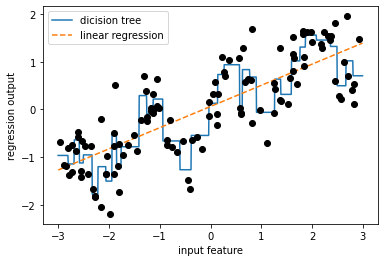

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label='dicision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('regression output')
plt.xlabel('input feature')
plt.legend(loc='best')

* 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분할(bining).

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print(f'bin edges: \n{kb.bin_edges_}')

bin edges: 
[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [6]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [7]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [9]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'input feature')

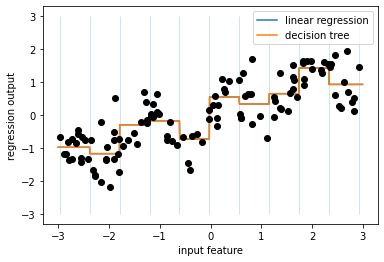

In [10]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('regression output')
plt.xlabel('input feature')

* 선형 모델이 훨씬 유연해진 것을 알 수 있다.
* 결정 트리는 덜 유연해졌다.
* 일부 특성과 출력이 비선형 관계지만, 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있다.

## 상호작용과 다항식
* 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 것.

In [15]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


In [16]:
X_combined

array([[-0.75275929,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.70428584,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.39196365,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.88057965,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.35535399,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23605345,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

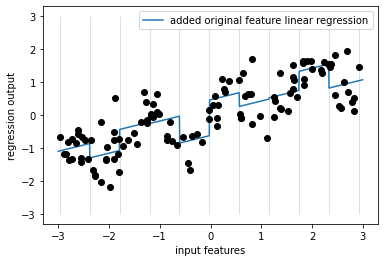

In [17]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='added original feature linear regression')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('regression output')
plt.xlabel('input features')
plt.plot(X[:, 0], y, 'o', c='k')

In [18]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


In [20]:
X_product[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

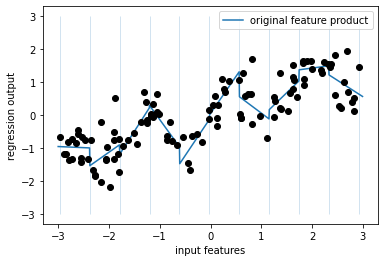

In [21]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='original feature product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('regression output')
plt.xlabel('input features')
plt.legend(loc='best')

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845,  0.32108831, -0.2417022 ,
        0.18194358, -0.13695972,  0.1030977 , -0.07760775,  0.05841996])

In [25]:
print(f'X_poly.shape: {X_poly.shape}')

X_poly.shape: (120, 10)


In [26]:
print('X element:\n', X[:5])
print('X_poly element:\n', X_poly[:5])

X element:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly element:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [28]:
print('name:\n', poly.get_feature_names())

name:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


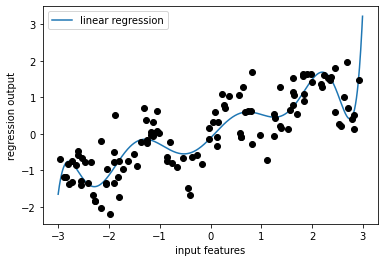

In [29]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('regression output')
plt.xlabel('input features')
plt.legend(loc='best')

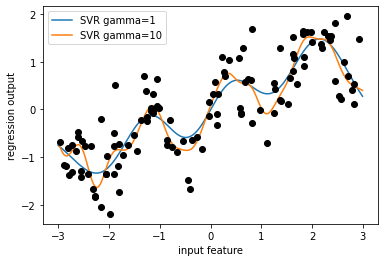

In [30]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label=f'SVR gamma={gamma}')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('regression output')
plt.xlabel('input feature')
plt.legend(loc='best')

In [31]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f'X_train.shape: {X_train.shape}')
print(f'X_train_poly.shape: {X_train_poly.shape}')

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


* 새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함한다.
    * degree=2로 하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있다.

In [33]:
print(f'feature names:\n{poly.get_feature_names()}')

feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print(f'no interaction score: {ridge.score(X_test_scaled, y_test):.3f}')
ridge = Ridge().fit(X_train_poly, y_train)
print(f'interaction score: {ridge.score(X_test_poly, y_test):.3f}')

no interaction score: 0.621
interaction score: 0.753


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print(f'no interaction score: {rf.score(X_test_scaled, y_test):.3f}')
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print(f'interaction score: {rf.score(X_test_poly, y_test):.3f}')

no interaction score: 0.795
interaction score: 0.775
